In [1]:
# playground for non-causal non-negative FIR filtering

import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.ndimage import gaussian_filter1d
from matplotlib.markers import MarkerStyle
from matplotlib import patches

<StemContainer object of 3 artists>

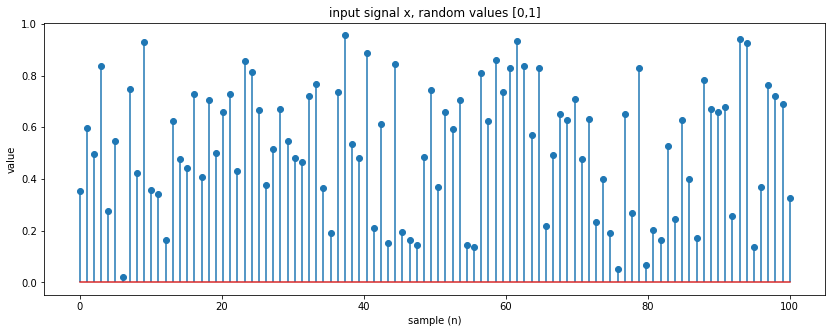

In [2]:
# random numbers as input
T = 100       # length of pos time
C = 100       # index t = 0
n = np.linspace(0,100,100)
x = np.zeros(301)
x[100:200] = random.rand(T)
fs = 1
Ts = 1/fs
wa = 0.1*np.pi
wb = 0.5*np.pi

sinx = np.sin(wa*Ts*n) + np.sin(wb*Ts*n)

fig= plt.figure(figsize=(14,5))
plt.title('input signal x, random values [0,1]')
plt.xlabel('sample (n)')
plt.ylabel('value')
plt.stem(n,x[100:200])
#plt.stem(n,sinx)

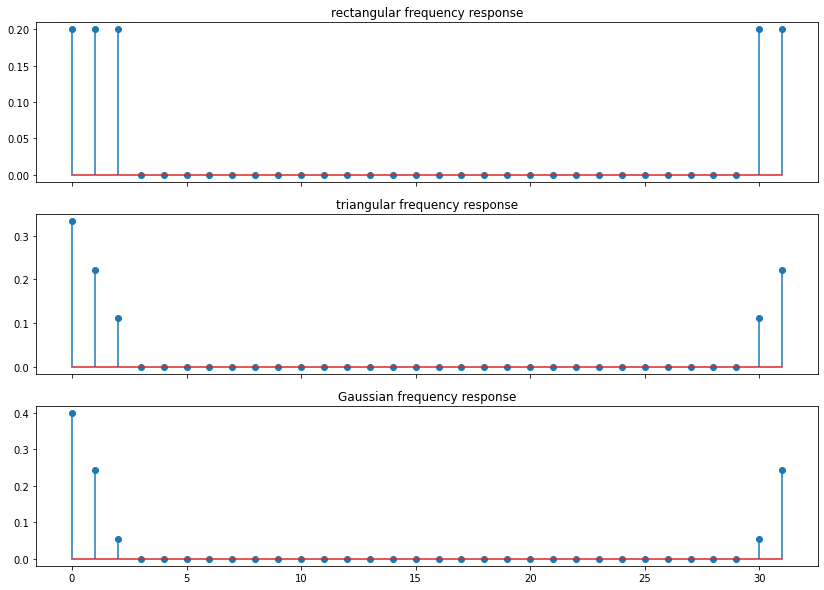

In [3]:
# define frequency responses
# cutoff freqs
Wc1 = 1
Wc2 = .2
Wc3 = .3

# define # freq bins
N = 2**5
f = range(N)

# normalize cutoff freq
wc1 = int(np.ceil((Wc1*N)/(2*np.pi)))
if wc1 % 2 == 0:
    wc1 = wc1 - 1
elif wc1 % 2 == 1:
    wc1 = wc1
    
# define window length, M
M = wc1
if M % 2 == 1:
    m = M//2 + 1
elif M % 2 == 0:
    m = M//2

# if window is smaller than half the signal length
if M < N//2:
    
    # rectangle
    # define frequency response, H0
    H0 = np.zeros(N)
    for k in range(m):
        H0[k] = 1/M
        if M % 2 == 1:
            if k > 0:
                H0[N-k] = 1/M
        else:
            H0[N-(k+1)] = 1/M

    # triangle
    # define freq resp, H1
    if M % 2 == 1:
        M1 = M//2 + 1
    else:
        M1 = M//2
    H1 = np.zeros(N)
    for q in range(M1):
        H1[q] = 1/M1
    H1 = signal.convolve(H1, H1, 'full')
    H1 = H1[:N]
    H1 = np.roll(H1,-(m-1))
        
    # Gaussian
    # freq resp, H2
    H2 = np.zeros(N)
    def gauss(size,sigma=1):
        r = range(-int(size/2),int(size/2)+1)
        return [1 / (sigma * math.sqrt(2*math.pi)) * math.exp(-float(x)**2/(2*sigma**2)) for x in r]
    g = gauss(M)
    H2[:M] = g
    H2 = np.roll(H2,-(m-1))
    
    # plot
    numPlot = 3
    fig, (ax0, ax1, ax2) = plt.subplots(numPlot, 1, figsize=(14, 10), sharex=True)
    ax0.stem(f,H0)
    ax0.set_title('rectangular frequency response')
    ax1.stem(f,H1)
    ax1.set_title('triangular frequency response')
    ax2.stem(f,H2)
    ax2.set_title('Gaussian frequency response')
    
else:
    print('M > N/2')

In [4]:
# verify freq responses are normalized
print('sum of H0 = %f' % sum(H0))
print('sum of H1 = %f' % sum(H1))
print('sum of H2 = %f' % sum(H2))

sum of H0 = 1.000000
sum of H1 = 1.000000
sum of H2 = 0.990866


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '|h0|')

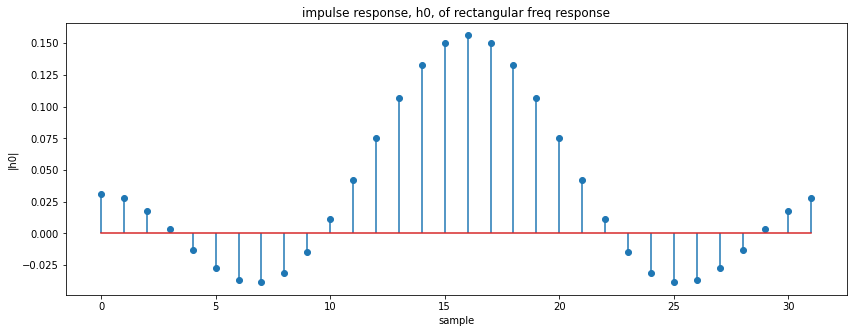

In [5]:
# plot impulse response of rectangular freq response
h0 = scipy.fft.ifft(H0)
h0 = np.roll(h0,-N//2)
#window = np.hamming(len(h0))
#h0 = window * h0
c0 = 1/sum(h0)
h0 = h0 * c0     # normalize so that sum(h) = 1
fig= plt.figure(figsize=(14,5))
plt.stem(h0)
plt.title('impulse response, h0, of rectangular freq response')
plt.xlabel('sample')
plt.ylabel('|h0|')

Text(0, 0.5, '|h0|')

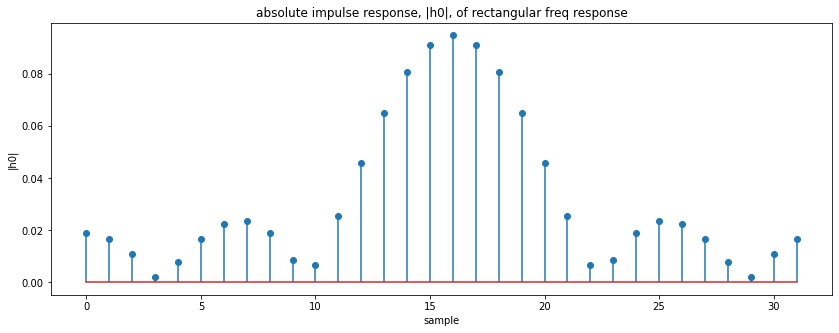

In [6]:
# plot non-negative impulse response of rectangular freq response
h0 = abs(scipy.fft.ifft(H0))
h0 = np.roll(h0,-N//2)
#window = np.hamming(len(h0))
#h0 = window * h0
c0 = 1/sum(h0)
h0 = h0 * c0     # normalize so that sum(h) = 1
fig= plt.figure(figsize=(14,5))
plt.stem(h0)
plt.title('absolute impulse response, |h0|, of rectangular freq response')
plt.xlabel('sample')
plt.ylabel('|h0|')

Text(0.5, 1.0, 'freq response of non-negative h0')

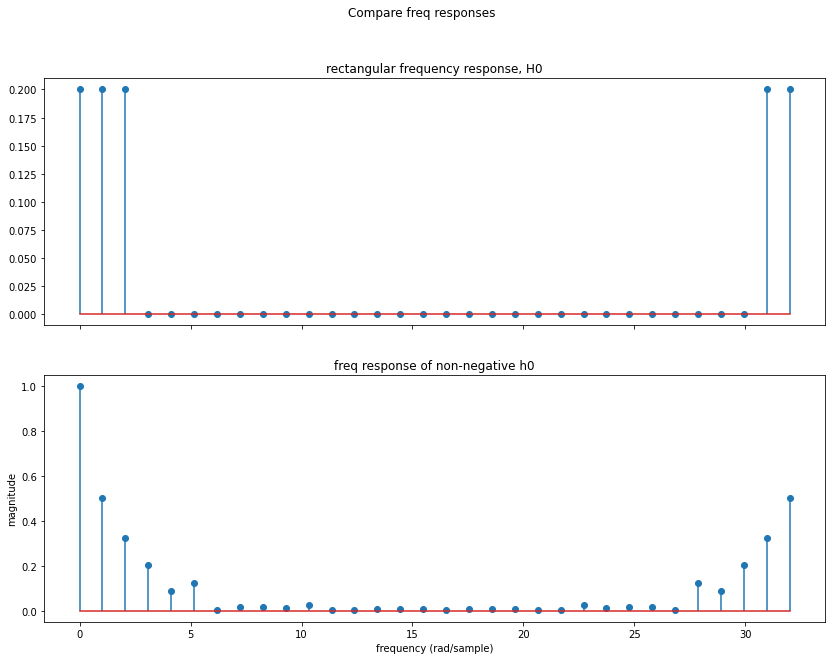

In [7]:
# how does the freq response of non-negative compare to original?
h0 = np.abs(h0)
X = scipy.fft.fft(h0)
X_mag = np.absolute(X)
f = np.linspace(0, N, N)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Compare freq responses')
plt.xlabel('frequency (rad/sample)')
plt.ylabel('magnitude')
ax0.stem(f,H0)
ax0.set_title('rectangular frequency response, H0')
ax1.stem(f, X_mag)
ax1.set_title('freq response of non-negative h0')

Text(0, 0.5, '|h0|')

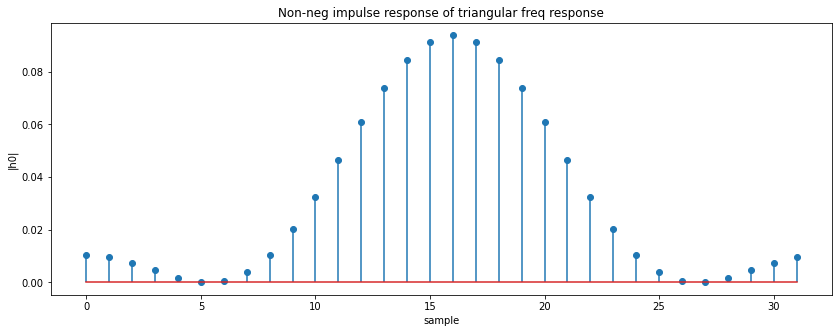

In [8]:
# plot non-neg impulse response of triangular freq response
h1 = abs(scipy.fft.ifft(H1))
h1 = np.roll(h1,-N//2)
#window = np.hamming(len(h1))
#h1 = window * h1
c1 = 1/sum(h1)
h1 = h1 * c1     # normalize so that sum(h) = 1
fig= plt.figure(figsize=(14,5))
plt.stem(h1)
plt.title('Non-neg impulse response of triangular freq response')
plt.xlabel('sample')
plt.ylabel('|h0|')

In [9]:
np.argmax(h1)

16

Text(0.5, 1.0, 'freq response of non-neg h1')

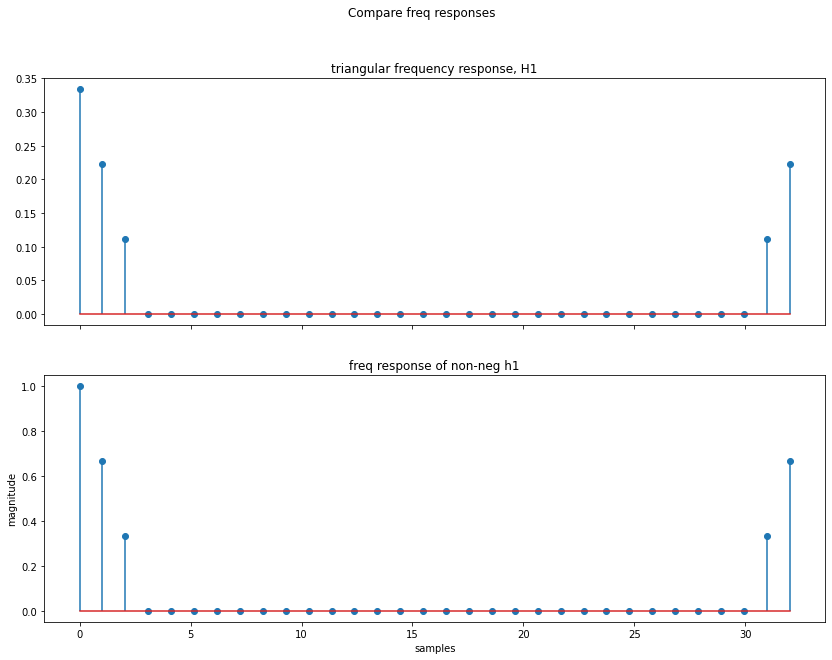

In [10]:
# how does the freq response of non-negative compare to original?
X = scipy.fft.fft(h1)
X_mag = np.absolute(X)
f = np.linspace(0, N, N)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Compare freq responses')
plt.xlabel('samples')
plt.ylabel('magnitude')
ax0.stem(f,H1)
ax0.set_title('triangular frequency response, H1')
ax1.stem(f, X_mag)
ax1.set_title('freq response of non-neg h1')

# complex values of h1 are miniscule, so |h1| ~= h1

Text(0, 0.5, '|h0|')

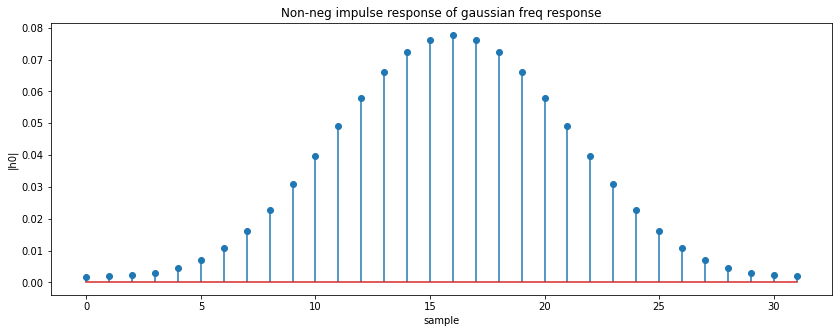

In [11]:
# plot non-neg impulse response of gaussian freq response
h2 = abs(scipy.fft.ifft(H2))
h2 = np.roll(h2,-N//2)
#window = np.hamming(len(h2))
#h2 = window * h2
c2 = 1/sum(h2)
h2 = h2 * c2    # normalize so that sum(h) = 1
fig= plt.figure(figsize=(14,5))
plt.stem(h2)
plt.title('Non-neg impulse response of gaussian freq response')
plt.xlabel('sample')
plt.ylabel('|h0|')

# complex values of h2 are miniscule, so |h2| ~= h2

Text(0.5, 1.0, 'freq response of non-neg h2')

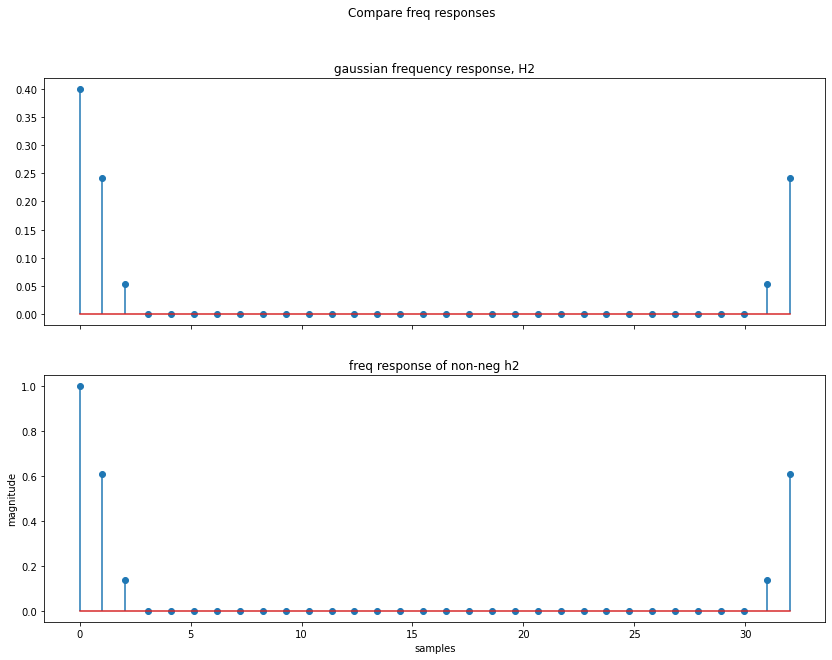

In [12]:
# how does the freq response of non-negative compare to original?
X = scipy.fft.fft(h2)
X_mag = np.absolute(X)
f = np.linspace(0, N, N)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Compare freq responses')
plt.xlabel('samples')
plt.ylabel('magnitude')
ax0.stem(f,H2)
ax0.set_title('gaussian frequency response, H2')
ax1.stem(f[:int(N)], X_mag[:int(N)])
ax1.set_title('freq response of non-neg h2')

In [13]:
# verify freq responses are normalized
print('sum of h0 = %f' % sum(h0))
print('sum of h1 = %f' % sum(h1))
print('sum of h2 = %f' % sum(h2))

sum of h0 = 1.000000
sum of h1 = 1.000000
sum of h2 = 1.000000


Text(0, 0.5, 'magnitude')

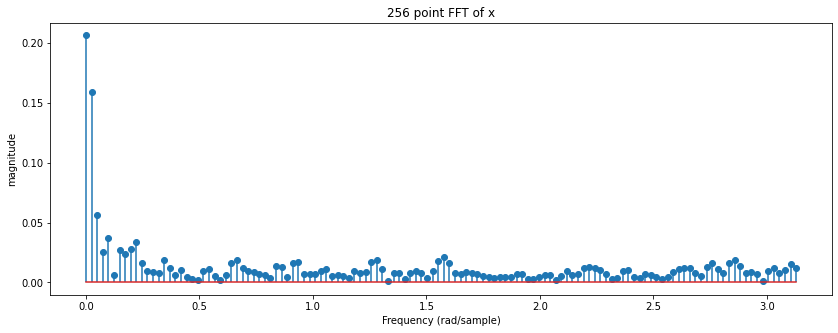

In [14]:
# fft of x
# zero pad x
#x0 = np.zeros(N)
x0 = x
F = 256
frad = np.linspace(0, 2*np.pi, F)

# fft padded input x0
X = scipy.fft.fft(x0,n=F)
X_mag = np.absolute(X)/F

# plot
plt.figure(figsize=(14, 5))
plt.title('%s point FFT of x' % F)
plt.stem(frad[:F//2], (X_mag[:F//2]))
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('magnitude')

Text(0.5, 1.0, 'original x')

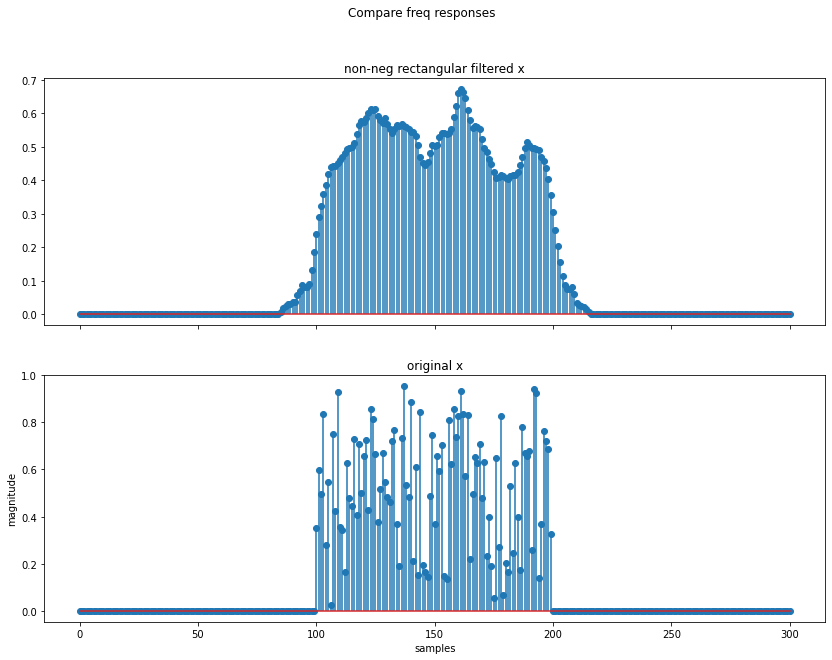

In [15]:
# convolve padded input x with h0
x_h0 = np.convolve(x, h0, 'same')
#x_h0 = np.convolve(x, np.roll(h1,-N), 'same')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Compare freq responses')
plt.xlabel('samples')
plt.ylabel('magnitude')
ax0.stem(x_h0)
ax0.set_title('non-neg rectangular filtered x')
ax1.stem(x)
ax1.set_title('original x')

Text(0.5, 1.0, 'original x')

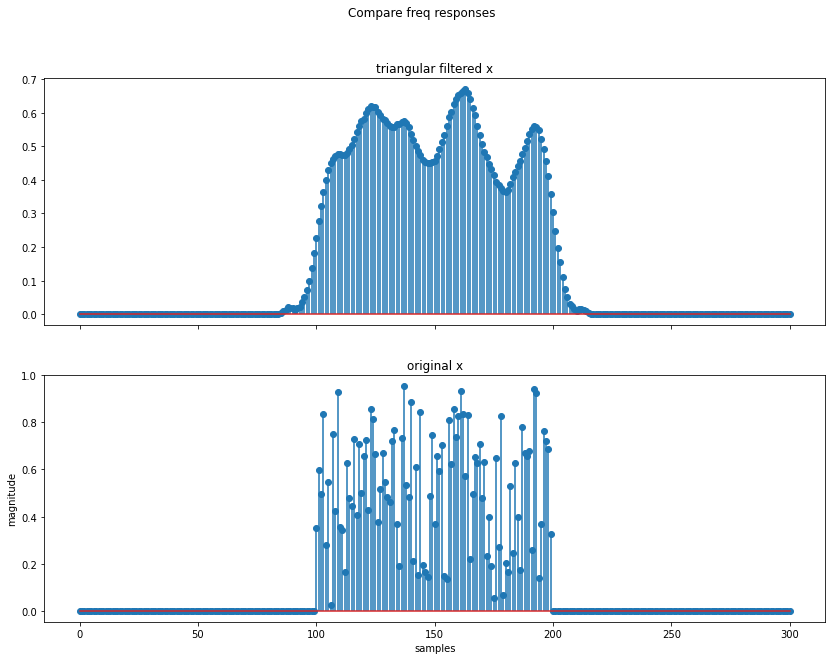

In [16]:
# convolve padded input x with h1
x_h1 = np.convolve(x, h1, 'same')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Compare freq responses')
plt.xlabel('samples')
plt.ylabel('magnitude')
ax0.stem(x_h1)
ax0.set_title('triangular filtered x')
ax1.stem(x)
ax1.set_title('original x')

Text(0.5, 1.0, 'original x')

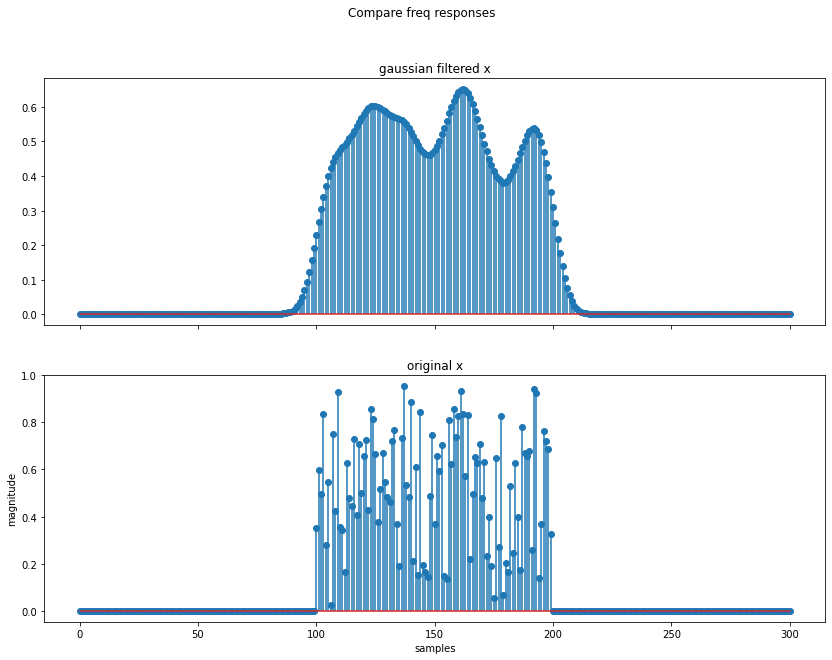

In [17]:
# convolve padded input x with h2
x_h2 = np.convolve(x, h2, 'same')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Compare freq responses')
plt.xlabel('samples')
plt.ylabel('magnitude')
ax0.stem(x_h2)
ax0.set_title('gaussian filtered x')
ax1.stem(x)
ax1.set_title('original x')

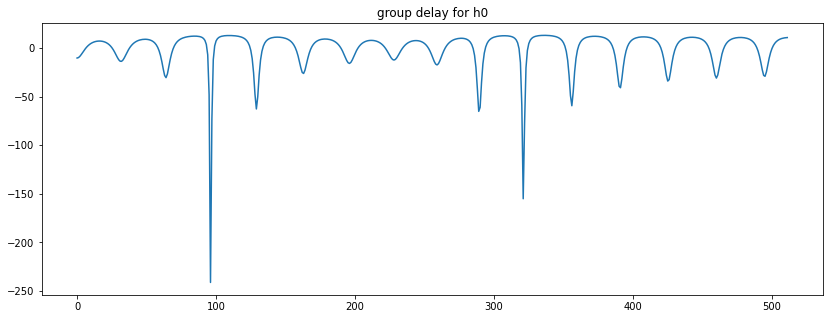

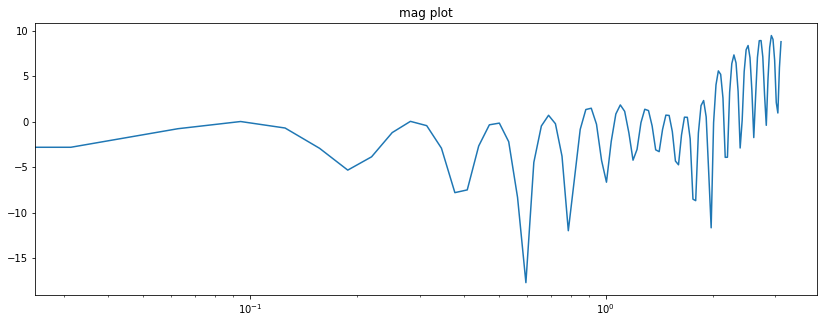

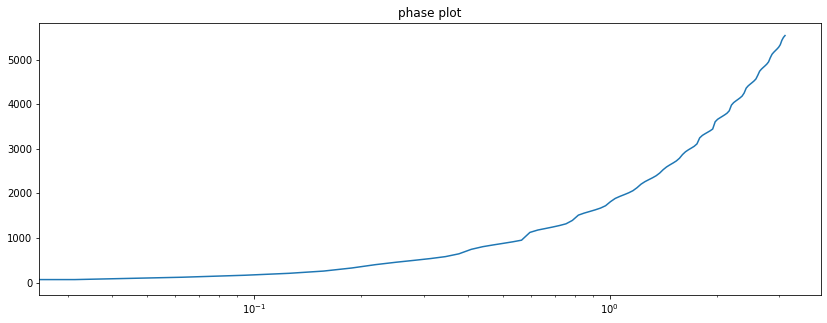

In [18]:
# frequency attributes of system from unity impulse response h0

b = scipy.fft.fft(h0)
a = 1
sys = signal.TransferFunction(b, a, dt=1)
[z,p,k] = scipy.signal.tf2zpk(b,a)
w, gd = signal.group_delay((b, a))
fig= plt.figure(figsize=(14,5))
plt.plot(gd)
plt.title('group delay for h0')
w, mag, phase = sys.bode()
fig= plt.figure(figsize=(14,5))
plt.semilogx(w, mag)    # Bode magnitude plot
plt.title('mag plot')
fig= plt.figure(figsize=(14,5))
plt.semilogx(w, phase)  # Bode phase plot
plt.title('phase plot')
plt.show()

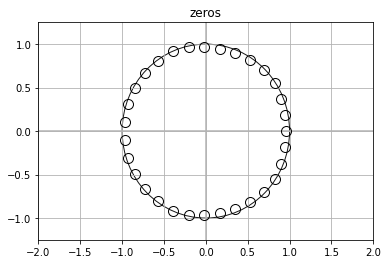

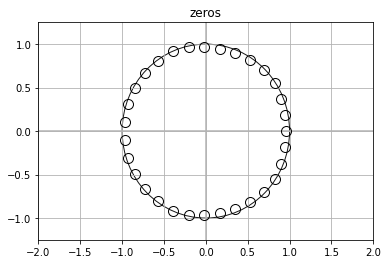

In [19]:
z,p,k = scipy.signal.tf2zpk(b,a)
def zplane(z, p):

    fig = plt.figure()
    ax = plt.subplot(1, 1, 1)

    unit_circle = patches.Circle((0,0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    plt.axvline(0, color='0.7')
    plt.axhline(0, color='0.7')
    plt.xlim((-2, 2))
    plt.ylim((-1.25, 1.25))
    plt.grid()

    plt.plot(z.real, z.imag, 'ko', fillstyle='none', ms = 10)
    plt.plot(p.real, p.imag, 'kx', fillstyle='none', ms = 10)
    plt.title('zeros')
    return fig

zplane(z,p)

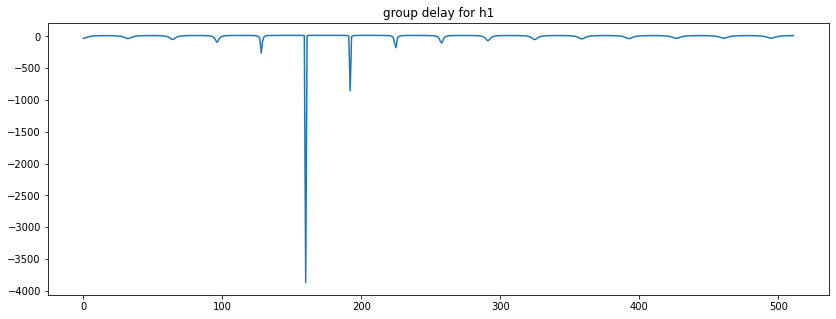

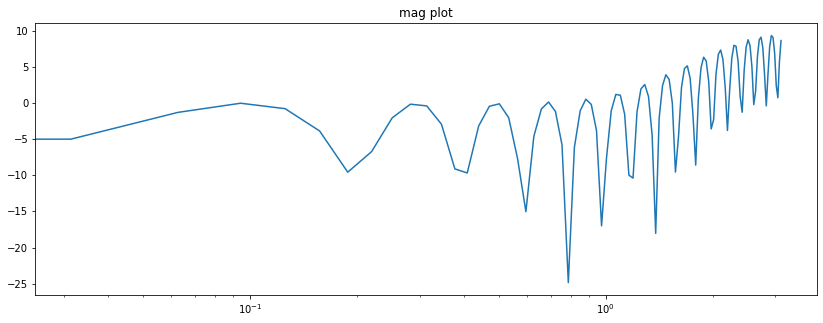

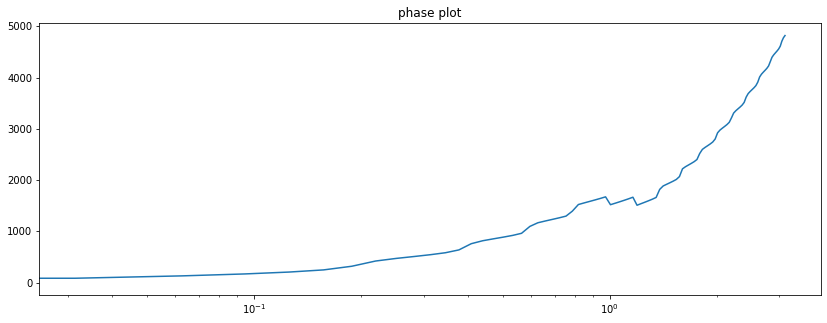

In [20]:
# frequency attributes of system from unity impulse response h1

b = scipy.fft.fft(h1)
a = 1
sys = signal.TransferFunction(b, a, dt=1)
[z,p,k] = scipy.signal.tf2zpk(b,a)
w, gd = signal.group_delay((b, a))
fig= plt.figure(figsize=(14,5))
plt.plot(gd)
plt.title('group delay for h1')
w, mag, phase = sys.bode()
fig= plt.figure(figsize=(14,5))
plt.semilogx(w, mag)    # Bode magnitude plot
plt.title('mag plot')
fig= plt.figure(figsize=(14,5))
plt.semilogx(w, phase)  # Bode phase plot
plt.title('phase plot')
plt.show()

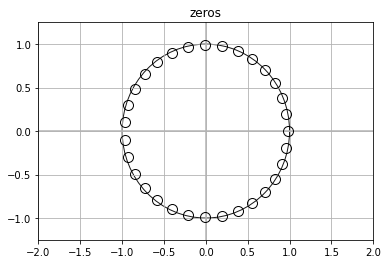

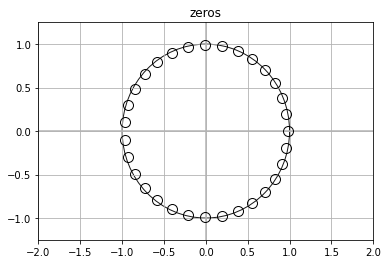

In [21]:
z,p,k = scipy.signal.tf2zpk(b,a)
zplane(z,p)

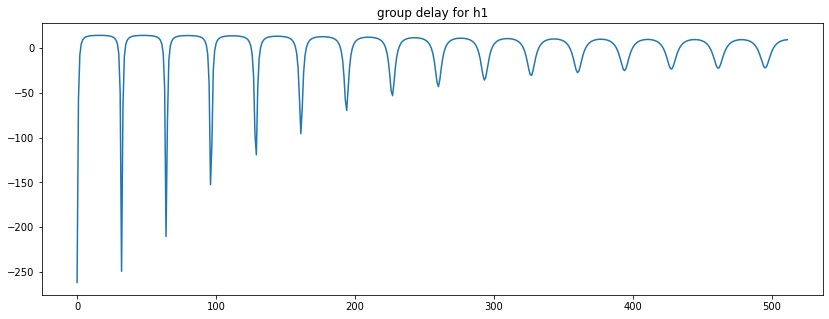

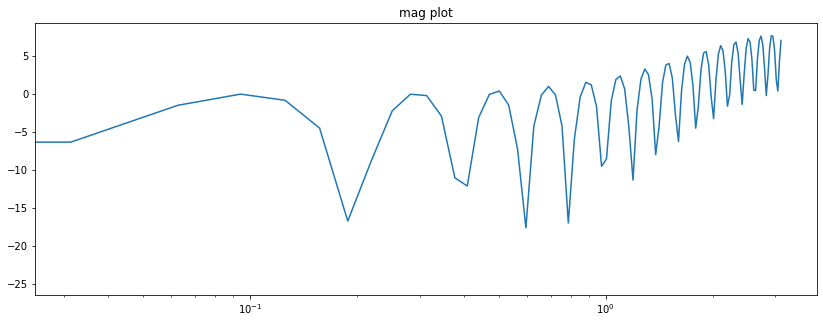

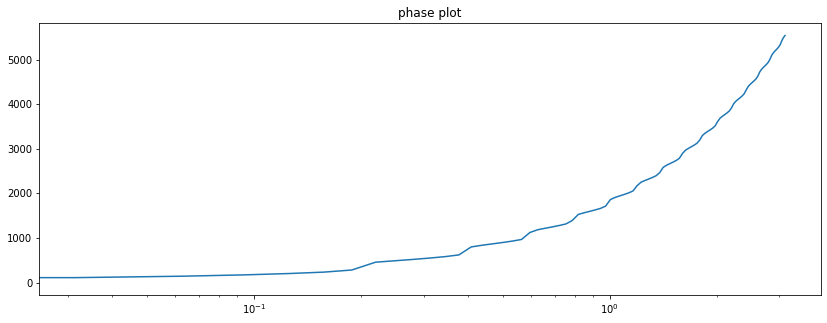

In [22]:
# frequency attributes of system from unity impulse response h2

b = scipy.fft.fft(h2)
a = 1
sys = signal.TransferFunction(b, a, dt=1)
[z,p,k] = scipy.signal.tf2zpk(b,a)
w, gd = signal.group_delay((b, a))
fig= plt.figure(figsize=(14,5))
plt.plot(gd)
plt.title('group delay for h1')
w, mag, phase = sys.bode()
fig= plt.figure(figsize=(14,5))
plt.semilogx(w, mag)    # Bode magnitude plot
plt.title('mag plot')
fig= plt.figure(figsize=(14,5))
plt.semilogx(w, phase)  # Bode phase plot
plt.title('phase plot')
plt.show()

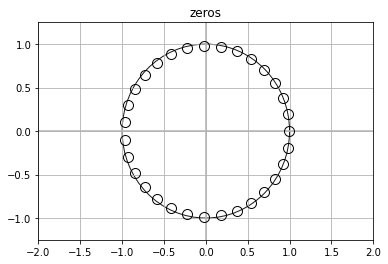

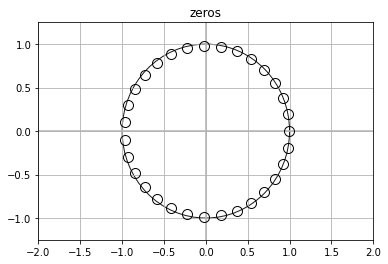

In [23]:
z,p,k = scipy.signal.tf2zpk(b,a)
zplane(z,p)